<a href="https://colab.research.google.com/github/taeyoung02/machine-deep-running/blob/master/%EC%A0%95%EB%B3%B4%EA%B2%80%EC%83%89%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install konlpy

In [1]:
import numpy as np
import pandas as pd
from tensorflow.python.keras.backend import softmax
from nltk.tokenize import word_tokenize, sent_tokenize
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt
import os
import re

데이터 전처리

In [2]:
ilbe = pd.read_excel('/content/drive/MyDrive/Ilbe0.xlsx')

clien= pd.read_excel('/content/drive/MyDrive/Clien0.xlsx')

OU = pd.read_excel('/content/drive/MyDrive/OU3.xlsx')

Moon = pd.read_excel('/content/drive/MyDrive/Moon.xlsx')

In [3]:
right=ilbe

In [4]:
left = pd.concat([clien, OU, Moon])

In [5]:
right['label']=1
left['label']=0

In [6]:
left = left[['title', 'label']]

In [7]:
right=right[['title','label']]

In [8]:
print(right.isnull().sum())
print(left.isnull().sum())

title    1
label    0
dtype: int64
title    0
label    0
dtype: int64


In [9]:
right.dropna(axis=0, inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
left.reset_index(drop=True, inplace=True)
right.reset_index(drop=True, inplace=True)

In [11]:
# 정규 표현식을 통한 한글 외 문자 제거
for i in range(len(right)):
    right['title'][i] = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","", right['title'][i])
for i in range(len(left)):
    left['title'][i] = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","", left['title'][i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [12]:
print(left.isnull().sum())

title    0
label    0
dtype: int64


In [13]:
print(right.isnull().sum())

title    0
label    0
dtype: int64


In [14]:
data=pd.concat([right,left])

In [15]:
# from hanspell import spell_checker
# x=[]
# for i in X:
#     spelled_sent = spell_checker.check(i)
#     hanspell_sent = spelled_sent.checked
#     x.append(hanspell_sent)
# 맞춤법 검사기가 사람이름을 교정해버려서 적용한것이 오류가 더 많음

In [16]:
data['title'].replace('', np.nan, inplace=True)
print(data.isnull().sum())

title    4
label    0
dtype: int64


In [17]:
data.dropna(axis=0, inplace=True)
data.reset_index(drop=True, inplace=True)

In [18]:
data.isnull().sum()

title    0
label    0
dtype: int64

In [19]:
X=data['title']
y=data['label']

Okt 형태소 분석기에 단어 추가
https://sirzzang.github.io/self/SELF-konlpy-userdic/   
링크의 설명대로 진행하시면 됩니다

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!pip3 install JPype1-py3

# automake 설치
os.chdir('/tmp')
!curl -LO http://ftpmirror.gnu.org/automake/automake-1.11.tar.gz
!tar -zxvf automake-1.11.tar.gz
os.chdir('/tmp/automake-1.11')
!./configure
!make
!make install

In [ ]:
# automake 설치 오류 시
os.chdir('/tmp/') 
!wget -O m4-1.4.9.tar.gz http://ftp.gnu.org/gnu/m4/m4-1.4.9.tar.gz
!tar -zvxf m4-1.4.9.tar.gz
os.chdir('/tmp/m4-1.4.9')
!./configure
!make
!make install
os.chdir('/tmp')
!curl -OL http://ftpmirror.gnu.org/autoconf/autoconf-2.69.tar.gz
!tar xzf autoconf-2.69.tar.gz
os.chdir('/tmp/autoconf-2.69')
!./configure --prefix=/usr/local
!make
!make install
!export PATH=/usr/local/bin

In [ ]:
import os

os.chdir('/usr/local/lib/python3.6/dist-packages/konlpy/java')
os.getcwd() 
os.makedirs('./aaa')

/usr/local/lib/python3.6/dist-packages/konlpy/java  안의 open-korean-text-2.1.0.jar 파일을   aaa 폴더로 옮겨줍니다

In [ ]:
os.chdir('/usr/local/lib/python3.6/dist-packages/konlpy/java/aaa')
!jar xvf open-korean-text-2.1.0.jar

In [ ]:
# 사용자 사전 열기
with open(f"/usr/local/lib/python3.6/dist-packages/konlpy/java/aaa/org/openkoreantext/processor/util/noun/names.txt", "r") as f:
    d = f.read()
# 단어추가
d += '문통\n문재앙\n문프\n문대통령\n국민의힘\n박근혜\n이명박근혜\n미통당\n미래통합당\n미통닭\n국민의힘\n국힘당\n국힘\n국민의짐\n더불당\n더민주\n더불어민주당\n더듬어만진당\n자한당\n자유한국당\n'

# 파일 새롭게 저장
# 사용자 사전 열기
with open(f"/usr/local/lib/python3.6/dist-packages/konlpy/java/aaa/org/openkoreantext/processor/util/noun/names.txt", "w") as f:
    f.write(d)

In [ ]:
os.chdir('/usr/local/lib/python3.6/dist-packages/konlpy/java/aaa')
!jar cvf ../open-korean-text-2.1.0.jar * 

여기까지 한 뒤 런타임 다시시작 (초기화X)   
jvm error가 뜬다면 jvm.py의 convertStrings=True 에 주석처리

In [20]:
# 단어 추가된것 확인
okt=Okt()
okt.morphs('문재인의 별명은 문통, 문프, 문재앙이며 국민의힘이 아닌 민주당이다')

['문재인',
 '의',
 '별명',
 '은',
 '문통',
 ',',
 '문프',
 ',',
 '문재앙',
 '이며',
 '국민의힘',
 '이',
 '아닌',
 '민주당',
 '이다']

In [21]:
X1 = []
okt=Okt()
stopterms = ['듯','의','가','을','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다','하는','하기','기','등']
for sentence in X:
    temp_X = []
    temp_X = okt.morphs(sentence) # 토큰화
    temp_X = [word for word in temp_X if not word in stopterms] # 불용어 제거
    print(temp_X)
    X1.append(temp_X)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
['고마워요', '문재인', '팀', '코리아', '데', '일리', '문']
['장작', '가의', '주', '저리', '회', '우주', '기운', '문재인', '김어준', '금태섭', '붙었어']
['문재인', '대통령', '김영철', '북핵', '방법론', '까지', '설명', '단계', '해법', '주목']
['근데', '문재인', '대통령', '대단한게']
['년', '총선', '때', '문재인', '전', '대표', '기억', '하시나요']
['홍준표', '지지자', '문재인', '지지자', '미묘한', '공통점']
['문재인', '대통령', '남북', '단일', '팀', '밀고', '나갔던', '이유']
['문재인', '대통령', '에게', '다', '그만', '두고', '컬링', '이나', '배우', '라는', '혼수', '성태']
['보름', '에게', '문재인']
['매국', '당', '예상', '문재인', '정부', '에서', '비핵화', '합의', '해선', '안', '돼']
['문재인', '대통령', '에게', '축전', '보냅시다']
['단독', '문재인', '대통령', '김영철', '회동', '에서', '비핵화', '필요성', '언급']
['성추행', '관련', '문재인', '하면']
['네이버', '문재인', '연관검색어']
['문재인', '대통령', '폐회식', '후', '폭풍', '트윗', '정리']
['영업', '왕', '문재인']
['평창', '올림픽', '폐회식', '참석', '문재인', '대통령', '귀빈', '사진']
['문재인', '대통령', '님', '축전', '입니다', '김태윤', '이상호', '선수']
['문재인', '대통령', '김보름', '양', '축전', '왜곡', '하지', '마세요']
['문재인', '대통령', '본', '제갈성렬', '배성재']
['문재인', '대통령', '김영철', '악수', '하면', '대통령', '인정', '안',

In [22]:
pip install soylemma

     |████████████████████████████████| 133kB 8.1MB/s 


https://ratsgo.github.io/korean%20linguistics/2017/03/16/words2/

한국어 종결어미 참고

In [23]:
from soylemma import Lemmatizer


def stem_words(X):
    stemmed=[]
    lemmatizer = Lemmatizer()
    for i in X:
        temp = []
        temp_stemmed = [word if lemmatizer.lemmatize(word)==[] else lemmatizer.lemmatize(word)[0][0] for word in i]
        for i in range(len(temp_stemmed)):
            if '겠' in temp_stemmed[i]:
                print(temp_stemmed[i] + '->', end='')
                a=temp_stemmed[i].find('겠')
                temp_stemmed[i]=temp_stemmed[i].replace(temp_stemmed[i][a:],'다')
                print(temp_stemmed[i])
            if '냈' in temp_stemmed[i]:
                print(temp_stemmed[i] + '->', end='')
                a=temp_stemmed[i].find('냈')
                temp_stemmed[i]=temp_stemmed[i].replace(temp_stemmed[i][a:],'내다')
                print(temp_stemmed[i])
            if '겼' in temp_stemmed[i]:
                print(temp_stemmed[i] + '->', end='')
                a=temp_stemmed[i].find('겼')
                temp_stemmed[i]=temp_stemmed[i].replace(temp_stemmed[i][a:],'기다')
                print(temp_stemmed[i])
            if '녔' in temp_stemmed[i]:
                print(temp_stemmed[i] + '->', end='')
                a=temp_stemmed[i].find('녔')
                temp_stemmed[i]=temp_stemmed[i].replace(temp_stemmed[i][a:],'니다')
                print(temp_stemmed[i])
            if '렸' in temp_stemmed[i]:
                print(temp_stemmed[i] + '->', end='')
                a=temp_stemmed[i].find('렸')
                temp_stemmed[i]=temp_stemmed[i].replace(temp_stemmed[i][a:],'리다')
                print(temp_stemmed[i])
            if '졌' in temp_stemmed[i]:
                print(temp_stemmed[i] + '->', end='')
                a=temp_stemmed[i].find('졌')
                temp_stemmed[i]=temp_stemmed[i].replace(temp_stemmed[i][a:],'다')
                print(temp_stemmed[i])
            if '했' in temp_stemmed[i]:
                print(temp_stemmed[i] + '->', end='')
                a=temp_stemmed[i].find('했')
                temp_stemmed[i]=temp_stemmed[i].replace(temp_stemmed[i][a:],'하다')
                print(temp_stemmed[i])
            if '었' in temp_stemmed[i]:
                print(temp_stemmed[i] + '->', end='')
                a=temp_stemmed[i].find('었')
                temp_stemmed[i]=temp_stemmed[i].replace(temp_stemmed[i][a:],'다')
                print(temp_stemmed[i])
            if '았' in temp_stemmed[i]:
                print(temp_stemmed[i] + '->', end='')
                a=temp_stemmed[i].find('았')
                temp_stemmed[i]=temp_stemmed[i].replace(temp_stemmed[i][a:],'다')
                print(temp_stemmed[i])
            if '한다' in temp_stemmed[i] and not '한다' == temp_stemmed[i]: 
                print(temp_stemmed[i] + '->', end='')
                a=temp_stemmed[i].find('한다')
                temp_stemmed[i]=temp_stemmed[i].replace(temp_stemmed[i][a:],'')
                print(temp_stemmed[i])
            if '됐다' in temp_stemmed[i] and not '됐다' == temp_stemmed[i]:
                print(temp_stemmed[i] + '->', end='')
                a=temp_stemmed[i].find('됐다')
                temp_stemmed[i]=temp_stemmed[i].replace(temp_stemmed[i][a:],'')
                print(temp_stemmed[i])
            if '는다' in temp_stemmed[i]:
                print(temp_stemmed[i] + '->', end='')
                a=temp_stemmed[i].find('는다')
                temp_stemmed[i]=temp_stemmed[i].replace(temp_stemmed[i][a:],'다')     
                print(temp_stemmed[i])
        stemmed.append(temp_stemmed)
    return stemmed

In [24]:
stemmed = stem_words(X1)

하겠네->하다
좋겠다->좋다
있겠노->있다
겠다->다
좃됐다->좃
치겠군->치다
않았을듯->않다
비었을거->비다
되겠다->되다
좋겠다->좋다
하겠다는->하다
폐쇄했다->폐쇄하다
부르겠다->부르다
하겠단다->하다
없겠네->없다
궁금했는데->궁금하다
몰락한다->몰락
도와주겠냐->도와주다
없었을텐데->없다
위대했는지->위대하다
얻는다->얻다
하겠냐->하다
았->다
덮는다면->덮다
하겠지->하다
되겠죠->되다
안남았다->안남다
하겠노->하다
패배했는데->패배하다
겠네->다
접었다->접다
성공했다고->성공하다
따르겠니->따르다
성공했다고->성공하다
시키겠다->시키다
있겠냐->있다
해드리겠습니다->해드리다
넘겠다->넘다
나겠니->나다
하겠다는->하다
집어넣겠지->집어넣다
해주겠지->해주다
해주겠지->해주다
되겠냐->되다
했다이기->하다
막는다에->막다
않겠다->않다
하겠냐->하다
빌겠냐->빌다
좋겠다->좋다
잃겠지->잃다
털리겠네->털리다
하겠다는->하다
어렵겠죠->어렵다
살겠다->살다
받겠다고->받다
이겠나->이다
받아내겠다는->받아내다
주도한다->주도
알겠지만->알다
살겠네->살다
꽂겠지->꽂다
가겠다는->가다
확실해졌다->확실해다
돋는다->돋다
되었을것->되다
되어있었던->되어있다
편하겠다는->편하다
되겠네->되다
걸겠다->걸다
않는다면->않다
정신차렸냐->정신차리다
하겠다는->하다
시원하겠다->시원하다
아닥한다->아닥
안남았다->안남다
싸우겠습니다->싸우다
과장한다->과장
겠죠->다
뿐이겠냐->뿐이다
몰겠다->몰다
이거겠죠->이거다
시키겠다는->시키다
알겠네->알다
옳았군->옳다
힘들겠네->힘들다
돼겠다->돼다
끌어안았지->끌어안다
가능하겠다->가능하다
하겠다는거노->하다
젋었->젋다
만들겠다->만들다
했나보다->하다
하겠죠->하다
치겠다->치다
주겠다->주다
해냈다도->해내다
않겠다->않다
놈이었다->놈이다
드리겠습니다->드리다
꿇었다는거냐->꿇다
조아리겠지->조아리다
않겠다->않다
좋겠다->좋다
아니겠노->아니다
미치겠네->미치다
살겠다->살다
참겠다->참다


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(stemmed, 
                                                    y, 
                                                    test_size=0.2,
                                                    shuffle=True, 
                                                    random_state=7)

In [26]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [27]:
print(tokenizer.word_index)

{'문재인': 1, '문재앙': 2, '하다': 3, '이다': 4, '대통령': 5, '보다': 6, '문프': 7, '되다': 8, '지다': 9, '님': 10, '가다': 11, '대다': 12, '있다': 13, '사다': 14, '문통': 15, '정부': 16, '로': 17, '물다': 18, '에서': 19, '정권': 20, '다': 21, '지지율': 22, '탄핵': 23, '않다': 24, '말다': 25, '알다': 26, '주다': 27, '낫다': 28, '에게': 29, '적': 30, '국민': 31, '마다': 32, '없다': 33, '지지다': 34, '것': 35, '조국': 36, '년': 37, '내다': 38, '아니다': 39, '한국': 40, '한다': 41, '같다': 42, '패다': 43, '박근혜': 44, '치다': 45, '트럼프': 46, 'ㅋㅋㅋ': 47, '서다': 48, '수': 49, '못': 50, '절다': 51, '김정은': 52, '오늘': 53, '중국': 54, '경제': 55, '꾸다': 56, '공': 57, '미국': 58, '노무현': 59, '때다': 60, '중': 61, '코로나': 62, '대한민국': 63, '사람': 64, '당': 65, '기다': 66, '거': 67, '북한': 68, '우리다': 69, '개다': 70, '오다': 71, '시다': 72, '민주당': 73, '새끼': 74, '지금': 75, '게': 76, '왜': 77, '걸다': 78, '좋다': 79, '나오다': 80, '명': 81, '대하다': 82, '차다': 83, '시키다': 84, '월': 85, '받다': 86, '부다': 87, '나르다': 88, '청와대': 89, '제': 90, '청원': 91, '살다': 92, '속보': 93, '일본': 94, '뉴스': 95, '진짜': 96, '달다': 97, '때문': 98, '라': 99, '대표': 100, '이르다

In [28]:

threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value
        print(key)

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
방남
젋다
난적
망은
뚫은
똘마니
배울것은
쁘라삐룬
소양강댐
지명자
강렬하다
평행
놀랄것
오피
셜
시경
퍼먹는
토대
낚시
임관식
각별히
잘잘못
신원
후베이성
이영일
무지하고
장성민
비웃기만
써주다
샛히
핵기술
보낸거
고성군
찔리다
불쌍한
벌것
빡빡이
상중
방사포
깽판
나랄
숙명여고
시험지
당당
무위
돌아간거냐
나서주다
이상한데요
미뤄지다
담
제페토
살수
주어지다
살고있다
독립선언서
라카
쳐주다
봤
슴
나이트워치
스노우
조부모
호적
실패하려는가
성령
숫
가락
유리한데
였노
창호
꺄
모니터링
뭐라고요
싫은가
뒷마당
패트리어트
개검
발광해도
정변
옹립
노총각
고소하러
막강
경제권
경제성장률
기우다
일방
회개
보는듯
포장
건전성
헤드
테이블
인문학
종반
중량
크거나
메우다
가능합니다
중국학
명당
소릴
어부
이상하네
연봉
온상
모토
쓰는거냐
산산이
개꿈
장담
한류
약진
패배하는
넘쳐나다
좌시하지
기쁘겟다
인데이단
종특
정배
ㅇㅁㅇ
되는거냐
여덟
맺다
임효준
콜마
말아먹게
미제
싫다고
강릉
옥계면
오죽하다
공채
구직
행렬
왜친
할말있나
김성령
바라는것
지갑
되셧나
자손
버리보다
선수협
스스럽다
한광옥
박영수
습관
사기치듯이
기침
가능하단다
유상
성공할것
웃기는건
한선교
권영진
영하다
알자지라
상처
받기전에
바라는건데
치사한
두서
맞췄나
역설
위중
열렬히
필터
가량
시중
기둥
샤
빠주다
미대
새운거
정풍운동
조성하
씽
무마
광기
루킹
정보원
무능력하네
민족사관고
심각하네요
안디옥
불기소
폴포트
도플갱어
조용하고
화려하게
부모님
하실수
태평양
싱
해야되다
썸네일
필요없으니
다급하긴
쇠귀
백낙청
로드맵
북과
덥다
박의
직구
김갱
욤
진땀
빼내다
운용
코레일
만루홈런
감빵행
몰지다
소용
최성식
기자간담회
찐따력
친일압잽
약호
정규
피맛
안하무인
경제학자
경박함의
신비로울
석태
가박
증여
공황
박정
세주다
ㅇ
더라도
대들다
난린데
만능
전능
우야
천지창조
나오기전에
저렴해진
나가주다
히죽
강동역
둘러쌓이다
요가
연구

In [29]:
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 5789


In [30]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

18656 4664 18656 4664


In [31]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

댓글 최대 길이 : 58
댓글 평균 길이 : 9.159948542024013


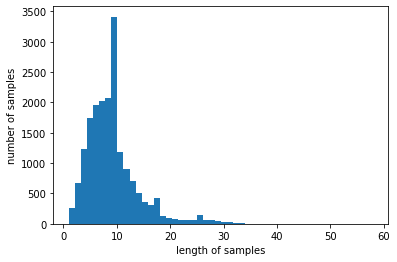

In [32]:
print('댓글 최대 길이 :',max(len(l) for l in X_train))
print('댓글 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [33]:

def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [34]:
max_len = 30
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 30 이하인 샘플의 비율: 99.64622641509435


In [35]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

모델 구현 및 임베딩층

In [36]:
from tensorflow.keras.layers import Embedding, Dense, LSTM, SimpleRNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split( X_train,
                                                    y_train, 
                                                    test_size=0.1,
                                                    shuffle=True, 
                                                    random_state=11)

In [82]:
model = Sequential()
model.add(Embedding(vocab_size, 32)) # 임베딩 벡터의 차원은 32
model.add(SimpleRNN(32)) # RNN 셀의 hidden_size는 32
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [83]:
# 최적의 파라미터 저장
mc = ModelCheckpoint('model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

history = model.fit(X_train, y_train,
          batch_size=64,
          epochs=20,
          callbacks=[mc],
          validation_data = (X_val, y_val))

Epoch 1/20
262/263 [============================>.] - ETA: 0s - loss: 0.3828 - acc: 0.8237
Epoch 00001: val_acc improved from -inf to 0.89550, saving model to model.h5
263/263 [==============================] - 2s 9ms/step - loss: 0.3825 - acc: 0.8238 - val_loss: 0.2401 - val_acc: 0.8955
Epoch 2/20
262/263 [============================>.] - ETA: 0s - loss: 0.1832 - acc: 0.9283
Epoch 00002: val_acc improved from 0.89550 to 0.92015, saving model to model.h5
263/263 [==============================] - 2s 8ms/step - loss: 0.1832 - acc: 0.9282 - val_loss: 0.2101 - val_acc: 0.9202
Epoch 3/20
262/263 [============================>.] - ETA: 0s - loss: 0.1490 - acc: 0.9420
Epoch 00003: val_acc did not improve from 0.92015
263/263 [==============================] - 2s 8ms/step - loss: 0.1490 - acc: 0.9420 - val_loss: 0.2066 - val_acc: 0.9132
Epoch 4/20
258/263 [============================>.] - ETA: 0s - loss: 0.1300 - acc: 0.9491
Epoch 00004: val_acc did not improve from 0.92015
263/263 [=======

In [40]:
def plot(history):
    epochs = range(1, len(history.history['acc']) + 1)
    plt.plot(epochs, history.history['acc'])
    plt.plot(epochs, history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.legend(['train', 'val'], loc='lower right')
    plt.show()

    epochs = range(1, len(history.history['loss']) + 1)
    plt.plot(epochs, history.history['loss'])
    plt.plot(epochs, history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(['train', 'val'], loc='upper right')
    plt.show()

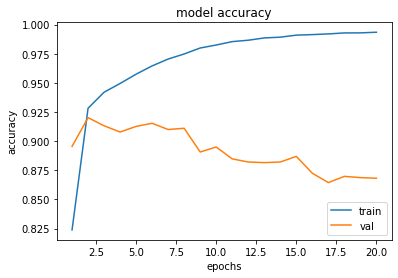

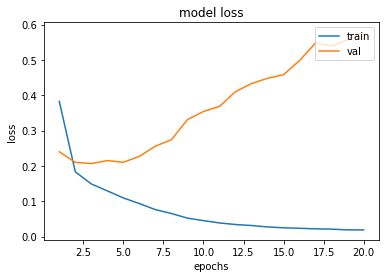

In [84]:
plot(history)

In [85]:
loaded_model = load_model('model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

146/146 [==============================] - 0s 2ms/step - loss: 0.2099 - acc: 0.9145

 테스트 정확도: 0.9145


In [86]:
def sentiment_predict(new_sentence, model):
    new_sentence.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
    new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
    new_sentence = [word for word in new_sentence if not word in stopterms] # 불용어 제거
    new_sentence=stem_words([new_sentence])[0]
    encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
    pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
    score = float(model.predict(pad_new)) # 예측
    if(score < 0.5):
        print("{:.2f}% 확률로 좌파입니다.\n".format((1-score) * 100))
    else:
        print("{:.2f}% 확률로 우파입니다.\n".format(score * 100))

In [87]:
sentiment_predict('저는 문재인 지지자 입니다', loaded_model)

77.01% 확률로 좌파입니다.



In [88]:
sentiment_predict('부동산 폭등의 주범 문재인 물러나라!', loaded_model)

98.32% 확률로 우파입니다.



In [89]:
sentiment_predict('문 대통령의 위상은 날로 높아집니다', loaded_model)

95.29% 확률로 좌파입니다.



In [90]:
sentiment_predict('문재앙을 탄핵하자', loaded_model)

99.59% 확률로 우파입니다.



In [91]:
sentiment_predict('문프 힘내세요!', loaded_model)

99.53% 확률로 좌파입니다.



In [49]:
import nltk
from gensim.models.word2vec import Word2Vec
import string

model = Word2Vec(stemmed ,window = 5,min_count=2,sg=1,iter=1000)

print(list(model.wv.vocab.keys()))
print("vocab length : %d"%len(model.wv.vocab))

['문재앙', '문제점', '위키', '박근혜', '메르스', '중국', '와중', '에도', '왤케', '앞장서다', '빨다', '이다', '대는거냐', '십', '새다', '키', '더불다', '빨갱이', '당', '또', '개다', '소리', '지껄이다', 'ㅋㅋㅋㅋㅋ', '처럼', '하다', '알다', '망하다', '세금', '폭탄', '갖가지', '규제', '로', '들다', '여전히', '북한', '구하다', '그러다', '것', '노비', '새끼', '누다', '려', '라', '거', '천도교인', '속임수', '같다', '좋다', '있다', '모습', '녹화', '대다', '트위터', 'ㅈ', '되다', '이번', '부정선거', '동맹', '중심', '보다', 'ㅋ', '대통령', '행세', '로써', '대한민국', '재앙', '닥치다', '아니다', '한국', '현재', '에서', '년', '느리다', '바이든', '감빵', '가다', '망명', '도지다', '굽다', '극상', '급증', '때문', '당나라', '행', '트럼프', '지금', 'ㄹㅇ', '어처구니', '없다', '년전', '발언', '대한항공', '국유화', '한다', '나르다', '일본', '스', '총리', '엄청', '요새', '매달리다', '중', 'ㅋㅋ', '속보', '사령관', '규탄', 'ㄷㄷㄷㄷ', '정권', '서울', '집값', '절대', '떨어주다', '만약', '역전', '좆', '눈치', '한테', '축하', '지지율', '최저', '오늘', '발표', '재다', '된거', '않다', '질문', '이명박', '전대통령', '에게', '정치', '보복', '게', '맞다', '시발', '더', '증말', '베이징', '로마', '일다', '국제', '수사', '그렇다', '국민', '최악', '실수', '시급', '경', '평화', '시다', '사망', '축', '생기다', 'ㄷㄷ', '초장', '부터', '항문', '벌리다', '꼬다', '흔들다', '

In [50]:
model.wv.most_similar("문재인")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('대통령', 0.7590005397796631),
 ('이다', 0.6104464530944824),
 ('하다', 0.5621194243431091),
 ('문재앙', 0.5301536321640015),
 ('인수위', 0.5220720767974854),
 ('정부', 0.4991626739501953),
 ('평택', 0.4944484531879425),
 ('풍수지리', 0.47059983015060425),
 ('승전', 0.4682944118976593),
 ('탱커', 0.4662831425666809)]

In [51]:
def get_vector(word,model):
    if word in model:
        return model[word]
    else:
        return None

In [52]:
model.vector_size

100

In [53]:
embedding_matrix = np.zeros((17976, 100))
# 단어 집합 크기의 행과 200개의 열을 가지는 행렬 생성. 값은 전부 0으로 채워진다.
np.shape(embedding_matrix)

(17976, 100)

In [54]:
for word, i in tokenizer.word_index.items(): # 훈련 데이터의 단어 집합에서 단어와 정수 인덱스를 1개씩 꺼내온다.
    temp = get_vector(word,model) # 단어(key) 해당되는 임베딩 벡터의 300개의 값(value)를 임시 변수에 저장
    if temp is not None: # 만약 None이 아니라면 임베딩 벡터의 값을 리턴받은 것이므로
        embedding_matrix[i] = temp # 해당 단어 위치의 행에 벡터의 값을 저장한다.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
model = Sequential()
e = Embedding(17976, 100, weights=[embedding_matrix], input_length=max_len, trainable=False)
model.add(e)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 100)           1797600   
_________________________________________________________________
flatten (Flatten)            (None, 3000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3001      
Total params: 1,800,601
Trainable params: 3,001
Non-trainable params: 1,797,600
_________________________________________________________________


In [93]:
# 최적의 파라미터 저장
mc = ModelCheckpoint('model2.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

history = model.fit(X_train, y_train,
          batch_size=64,
          epochs=30,
          callbacks=[mc],
          validation_data = (X_val, y_val))

Epoch 1/30
260/263 [============================>.] - ETA: 0s - loss: 0.0150 - acc: 0.9942
Epoch 00001: val_acc improved from -inf to 0.85477, saving model to model2.h5
263/263 [==============================] - 2s 8ms/step - loss: 0.0149 - acc: 0.9942 - val_loss: 0.6682 - val_acc: 0.8548
Epoch 2/30
260/263 [============================>.] - ETA: 0s - loss: 0.0145 - acc: 0.9944
Epoch 00002: val_acc did not improve from 0.85477
263/263 [==============================] - 2s 8ms/step - loss: 0.0145 - acc: 0.9943 - val_loss: 0.7219 - val_acc: 0.8494
Epoch 3/30
263/263 [==============================] - ETA: 0s - loss: 0.0144 - acc: 0.9949
Epoch 00003: val_acc did not improve from 0.85477
263/263 [==============================] - 2s 8ms/step - loss: 0.0144 - acc: 0.9949 - val_loss: 0.7298 - val_acc: 0.8424
Epoch 4/30
256/263 [============================>.] - ETA: 0s - loss: 0.0136 - acc: 0.9948
Epoch 00004: val_acc improved from 0.85477 to 0.86120, saving model to model2.h5
263/263 [=====

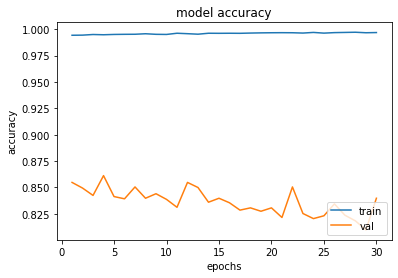

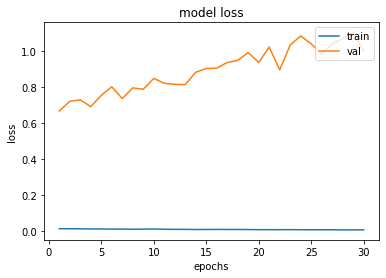

In [94]:
plot(history)

In [95]:
loaded_model2 = load_model('model2.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model2.evaluate(X_test, y_test)[1]))

146/146 [==============================] - 0s 2ms/step - loss: 0.6135 - acc: 0.8707

 테스트 정확도: 0.8707


In [96]:
sentiment_predict('저는 문재인 지지자 입니다', loaded_model2)

54.76% 확률로 좌파입니다.



In [97]:
sentiment_predict('부동산 폭등의 주범 문재인 물러나라!', loaded_model2)

99.18% 확률로 우파입니다.



In [98]:
sentiment_predict('문 대통령의 위상은 날로 높아집니다', loaded_model2)

99.53% 확률로 좌파입니다.



In [99]:
sentiment_predict('문재앙을 탄핵하자', loaded_model2)

99.99% 확률로 우파입니다.



In [100]:
sentiment_predict('문프 힘내세요!', loaded_model2)

99.32% 확률로 좌파입니다.



In [101]:
from gensim import models
from gensim.models import FastText
#Fasttext

In [ ]:
F_model = FastText(stemmed, size=200, workers=4, sg=1, iter=5, word_ngrams=4)

In [ ]:
len(X_train),len(X_test)

In [ ]:
F_model.vector_size

In [ ]:
for word, i in tokenizer.word_index.items(): # 훈련 데이터의 단어 집합에서 단어와 정수 인덱스를 1개씩 꺼내온다.
    temp = get_vector(word,F_model) # 단어(key) 해당되는 임베딩 벡터의 300개의 값(value)를 임시 변수에 저장
    if temp is not None: # 만약 None이 아니라면 임베딩 벡터의 값을 리턴받은 것이므로
        embedding_matrix[i] = temp # 해당 단어 위치의 행에 벡터의 값을 저장한다.

In [ ]:
F_model = Sequential()
e = Embedding(17976, 200, weights=[embedding_matrix], input_length=max_len, trainable=False)
F_model.add(e)
F_model.add(Flatten())
F_model.add(Dense(1, activation='sigmoid'))
F_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
F_model.summary()

In [ ]:
# 최적의 파라미터 저장

mc = ModelCheckpoint('F_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
history = F_model.fit(X_train, y_train,
          batch_size=64,
          epochs=100,
          callbacks=[mc],
          validation_data = (X_val, y_val))

In [ ]:
loaded_F_model = load_model('F_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_F_model.evaluate(X_test, y_test)[1]))

In [ ]:
sentiment_predict('저는 문재인 지지자 입니다', loaded_F_model)

In [ ]:
sentiment_predict('부동산 폭등의 주범 문재인 물러나라!', loaded_F_model)

In [ ]:
sentiment_predict('문 대통령의 위상은 날로 높아집니다', loaded_F_model)

In [ ]:
sentiment_predict('문재앙을 탄핵하자', loaded_F_model)

In [ ]:
sentiment_predict('문프 힘내세요!', loaded_F_model)